Start basic: only considering sources taken in WFD survey. 

In [49]:
%matplotlib notebook

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from operator import itemgetter
from cesium.time_series import TimeSeries
import cesium.featurize as featurize
from tqdm import tnrange, tqdm_notebook
import schwimmbad

#typically I use pandas, but it doesn't conform to the code used for starting up :) 
from astropy.table import Table
import os

In [14]:
data = Table.read('../data/training_set.csv',format='csv')
#meta_data = pd.read_csv('../data/training_set_metadata.csv')
meta_data = Table.read('../data/training_set_metadata.csv', format='csv')


In [16]:
meta_data

<Table length=7848>
object_id     ra        decl      gal_l    ... distmod  mwebv  target
  int64    float64    float64    float64   ... float64 float64 int64 
--------- ---------- ---------- ---------- ... ------- ------- ------
      615 349.046051 -61.943836  320.79653 ...     nan   0.017     92
      713  53.085938 -27.784405 223.525509 ... 45.4063   0.007     88
      730  33.574219  -6.579593 170.455585 ... 40.2561   0.021     42
      745   0.189873 -45.586655 328.254458 ... 40.7951   0.007     90
     1124 352.711273 -63.823658 316.922299 ... 40.4166   0.024     90
     1227  35.683594  -5.379379 171.992947 ...     nan    0.02     65
     1598  347.84671 -64.760857 318.929827 ... 39.7279   0.019     90
     1632 348.595886  -63.07262 320.023289 ... 43.1524   0.021     42
     1920 149.414062   3.433834 234.919132 ... 41.1401   0.027     90
     1926 149.414062   1.940072 236.565366 ...     nan   0.018     65
      ...        ...        ...        ... ...     ...     ...    ...
130684460 117.949219  -0.895283 220.752608 ...     nan   0.053     16
130695262       90.0 -20.264481 226.045011 ... 46.6624   0.043     15
130698059 142.734375 -18.997131 250.892051 ... 37.0254   0.045     67
130716752 337.372894 -57.209084 332.816119 ...     nan   0.016     16
130727624 294.960938  -4.031936  34.856817 ...     nan   0.291     65
130739978   26.71875 -14.940303 172.342697 ...     nan   0.013     65
130755807 120.101349 -62.696659 275.742955 ... 46.6108   0.136     90
130762946 203.108109 -55.682144 308.728904 ...     nan    0.43     16
130772921  79.101562 -35.501846 239.172243 ...     nan   0.034     65
130779836 301.992188 -17.426323  25.102988 ...     nan   0.091      6

In [17]:
data

<Table length=1421705>
object_id    mjd     passband     flux      flux_err detected
  int64    float64    int64     float64     float64   int64  
--------- ---------- -------- ------------ --------- --------
      615 59750.4229        2  -544.810303  3.622952        1
      615 59750.4306        1  -816.434326   5.55337        1
      615 59750.4383        3  -471.385529  3.801213        1
      615  59750.445        4  -388.984985 11.395031        1
      615  59752.407        2  -681.858887  4.041204        1
      615 59752.4147        1 -1061.457031  6.472994        1
      615 59752.4224        3   -524.95459  3.552751        1
      615 59752.4334        4  -393.480225  3.599346        1
      615 59752.4435        5   -355.88678 10.421921        1
      615 59767.2968        2   -548.01355  3.462291        1
      ...        ...      ...          ...       ...      ...
130779836 60542.0489        4   -60.500492 14.743795        0
130779836 60543.0247        4   -48.527161  24.00408        0
130779836 60545.9844        5    32.006413 77.931732        0
130779836 60546.9804        5    68.152985 56.351048        0
130779836 60548.9789        4   -60.066154 34.353317        0
130779836 60555.9838        4   -39.881969 46.477093        0
130779836 60560.0459        1    14.894439 18.947685        0
130779836 60571.0225        5     30.59313  50.69529        0
130779836 60585.9974        4   -23.471439 44.819859        0
130779836 60588.0372        0   -41.214264 51.665123        0

<IPython.core.display.Javascript object>


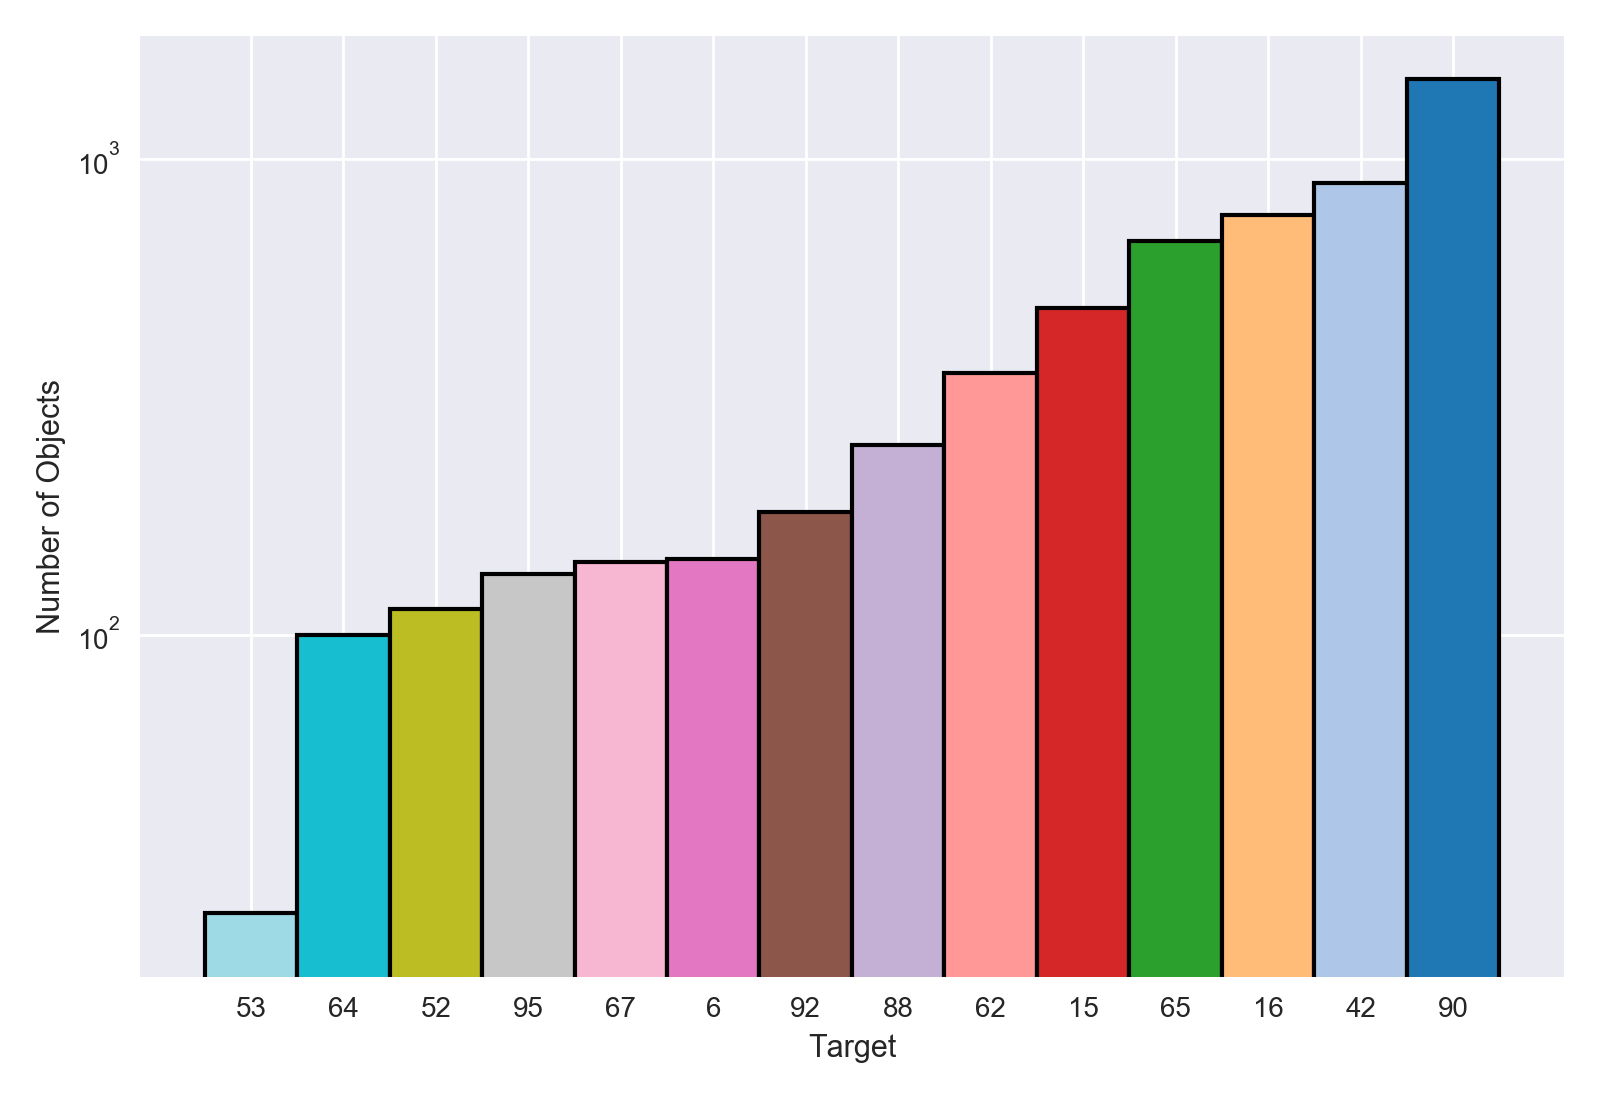

In [19]:
counts = Counter(wfd_meta_data['target'])
labels, values = zip(*sorted(counts.items(), key=itemgetter(1)))
fig, ax = plt.subplots()

cmap = plt.cm.tab20
nlines = len(labels)
classcolor =  list(cmap(np.linspace(0,1,nlines)))[::-1]

# we'll create a mapping between class and color
classcolmap = dict(zip(labels, classcolor))

indexes = np.arange(nlines)
width = 1
ax.bar(indexes, values, width, edgecolor='k',\
       linewidth=1.5, tick_label=labels, log=True, color=classcolor)
ax.set_xlabel('Target')
ax.set_ylabel('Number of Objects')
fig.tight_layout()

This bar graph quickly shows a disparity in the labelled objects, which while not unusual for astronomy, just means to be wary of misleading predictions (ie if all objects were classified as the most common it would retain a good accuracy, but still not meean much. 

In [ ]:

"""

WARNING: This broke my code on my local disk so don't run it! Iterating over 1.4 milion rows has
consequences!
wfd_data = []
for i,row in enumerate(data['object_id']):
  #  print(row)
    if row in wfd_meta_data['object_id'].values:
        wfd_data.append(data.values[i])
        
"""

This is taken from the starter kit. It is a basic mapping used to go from the passband name from the integer

In [20]:


pbmap = OrderedDict([(0,'u'), (1,'g'), (2,'r'), (3,'i'), (4, 'z'), (5, 'y')])

# it also helps to have passbands associated with a color
pbcols = OrderedDict([(0,'blueviolet'), (1,'green'), (2,'red'),\
                      (3,'orange'), (4, 'black'), (5, 'brown')])

pbnames = list(pbmap.values())

In [22]:
lcdata = data  #light curve data
nobjects = len(meta_data)  #number of sources

tsdict = OrderedDict()  #create a dictionary for each time series
for i in tnrange(nobjects, desc='Building Timeseries'): #descending order
    row = meta_data[i]
    thisid = row['object_id']
    target = row['target']
    
    meta = {'z':row['hostgal_photoz'],\
            'zerr':row['hostgal_photoz_err'],\
            'mwebv':row['mwebv']}
    
    ind = (lcdata['object_id'] == thisid)
    thislc = lcdata[ind]

    pbind = [(thislc['passband'] == pb) for pb in pbmap]  #mask individual passpands
    t = [thislc['mjd'][mask].data for mask in pbind ]  # mask of times for specific passband
    m = [thislc['flux'][mask].data for mask in pbind ] #mask of flux at the same times for this passband
    e = [thislc['flux_err'][mask].data for mask in pbind ] #mask for flux errors for this passband

    tsdict[thisid] = TimeSeries(t=t, m=m, e=e,\
                        label=target, name=thisid, meta_features=meta,\
                        channel_names=pbnames )
    
del lcdata

What is this timeseries blob doing? 

Creates a "timeseries" object for each lightcurve. Each lightcurve is uniquely classified based on it object id and target

The resulting tsdict contains 7848 keys, where each is a time series object in itself where the values are further distingueshed based on the passband used. 

So in the end, each one of these 7848 time series objects will contain smaller subsets within contianing the unique passbands, and inside each of those is the flux, mjd, and errors. 

In [52]:
def worker(tsobj):
    global features_to_use
    thisfeats = featurize.featurize_single_ts(tsobj,\
    features_to_use=features_to_use,
    raise_exceptions=False)
    return thisfeats

In [54]:

features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "maximum",
                   "max_slope",
                   "median",
                   "median_absolute_deviation",
                   "percent_close_to_median",
                   "minimum",
                   "skew",
                   "std",
                   "weighted_average"]


In [55]:
featurefile = '../data/plasticc_featuretable.npz'
if os.path.exists(featurefile):
    featuretable, _ = featurize.load_featureset(featurefile)
else:
    features_list = []
    with tqdm_notebook(total=nobjects, desc="Computing Features") as pbar:
        with schwimmbad.MultiPool() as pool:  
            results = pool.imap(worker, list(tsdict.values()))
            for res in results:
                features_list.append(res)
                pbar.update()
            
    featuretable = featurize.assemble_featureset(features_list=features_list,\
                              timet_series=tsdict.values())
    featurize.save_featureset(fset=featuretable, path=featurefile)

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasman

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/feat

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anac

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/feat

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/py

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasman

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/cor

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadenc

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: overflow encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ce

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/py

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/fe

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/py

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasman

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/py

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/fe

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/fe

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/f

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/si

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/si

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amp

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/fe

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/fe

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/si

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasman

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - a

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anac

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/py

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/pytho

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarni

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarni

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/feat

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitud

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow 

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_bas

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ces

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/feat

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/sit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/feat

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anacond

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/fu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/f

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/l

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: divide by zero encountered in do

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitud

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarni

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ces

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anacond

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarn

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: Ru

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow enco

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noah

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anacon

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/li

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaco

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaco

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: divide by zero encountered in do

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeW

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid v

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Use

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaco

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasma

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value enco

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: Ru

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_s

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anacon

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/feature

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/sit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:2

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-pack

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasman

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: overflow encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: 

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/User

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return max(abs((y_max - y_med) / y

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-pac

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeW

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anacond

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesiu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaco

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeW

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_bas

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: Ru

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_bas

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkas

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasman

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packag

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anacond

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value enco

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anacon

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value enco

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/functi

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ces

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/a

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: Ru

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, 

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/feat

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow 

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ces

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarni

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasman

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: Run

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid v

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaco

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/f

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/User

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_bas

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaco

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasman

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: Ru

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: 

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWar

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packag

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/featu

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitud

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasman

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scarg

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/feat

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ces

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitud

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: Ru

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packag

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/n

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/n

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scarg

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplit

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: overflow encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: overflow encountered in double_scalars
  ret

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ces

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anacon

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: R

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/c

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2.

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-p

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid v

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/pyth

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return max(abs((y_max - y_med) / y_med), abs((y_med - y_min) / y_med))
/Users/noahkasmanoff/anaconda/lib/pytho

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: Runti

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarni

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ces

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:266: RuntimeWarning: invalid value encountered in sqrt
  dphase[j] = np.sqrt(np.dot(np.dot(v, m), v))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/li

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:253: RuntimeWarning: invalid value encountered in sqrt
  out_dict['trend_error'] = np.sqrt(np.diag(vmodl0))
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return (y_95 - y_5) / y_50
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:48: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return (y_high - y_low) / (y_95 - y_5)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitud

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/l

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:18: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/amplitude.py:35: RuntimeWarning: overflow encountered in power
  linear_scale_data = base ** (exponent * x)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:218: RuntimeWarning: invalid value encountered in subtract
  hat_matr -= hat_matr0
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/features/lomb_scargle.py:256: RuntimeWarning: invalid value encountered in sqrt
  damp = np.sqrt(A0**2 * vA0 + B0**2 * vB0 + 2. * A0 * B0 * covA0B0) / amp
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/cesium/

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/lib/npyio.py:665: UserWarning: Stored array in format 2.0. It can only beread by NumPy >= 1.9
  pickle_kwargs=pickle_kwargs)


Below is a quick refresher for how these time series objects operate. Below I have outputted a few values, where it corresponds to the 615 object, the first source captured, and where the .time attribute is all of the time recorded, where the index 0 corresponds to one of the filters. For the flux readings and actual name of this filter, the corresponding index is then used for the measuerment and channel name attributes. Finally, the label attribute, just gives the assign label for this huge conglomeration of data, making it possible to perform some kind of supervised learning. 

In [57]:
tsdict[615].time[0]

array([ 59819.1532,  59820.1047,  59821.1026,  59822.1105,  59823.1505,
        59851.1114,  59874.0599,  59875.0311,  59876.0231,  59877.0238,
        59878.0246,  59879.0248,  59880.0258,  60118.4163,  60140.229 ,
        60141.2225,  60142.2202,  60143.2212,  60144.2186,  60145.2123,
        60176.1332,  60177.137 ,  60198.1077,  60199.0914,  60200.065 ,
        60201.068 ,  60202.0552,  60206.1107,  60207.1469,  60228.0187,
        60229.0162,  60234.0265,  60260.0423,  60261.0361,  60262.0367,
        60263.0373,  60264.0465,  60499.2467,  60500.2437,  60501.2385,
        60502.2355,  60524.239 ,  60525.1736,  60554.0964,  60555.0951,
        60556.0879,  60557.0831,  60558.1093,  60559.1097,  60560.1065,
        60582.084 ,  60583.0169,  60584.0117,  60585.0117,  60586.0123,
        60587.0127,  60588.0131,  60612.0266,  60613.0269,  60614.0276,
        60615.0375,  60616.029 ,  60617.0295])

In [58]:
tsdict[615].measurement[0]

array([   6.878784,   39.364853,  -10.422381,  -65.48513 , -113.349159,
        -68.502457,  -97.353195,  -97.52388 , -108.672577, -116.913223,
       -102.768921,  -52.407089,   55.567715, -107.080536,  -88.981155,
        -50.179337,   50.00864 ,  110.753555,  120.867218,  111.464226,
        -49.905262,  -87.160583,  100.12928 ,   86.776741,   82.078186,
         41.947815,    9.061676,  -83.072884,  108.483109,    6.768485,
        -35.14933 ,  -52.922794,  108.020546,  125.182808,  107.64978 ,
         61.068066,   -9.100937,  106.447296,   67.234062,   24.868933,
        -15.392517,   89.070496,  118.935989,   82.168922,   49.886921,
          9.075453,  -30.764908, -101.419899, -110.688477, -114.774445,
        -51.614189,   20.364273,  -24.682575,  -63.5466  , -101.81929 ,
       -110.978699, -113.588432, -110.649872,  -89.973892,  -10.015225,
         99.438087,  120.849113,  121.411896])

In [63]:
tsdict[615].channel_names[0]

'u'

<IPython.core.display.Javascript object>


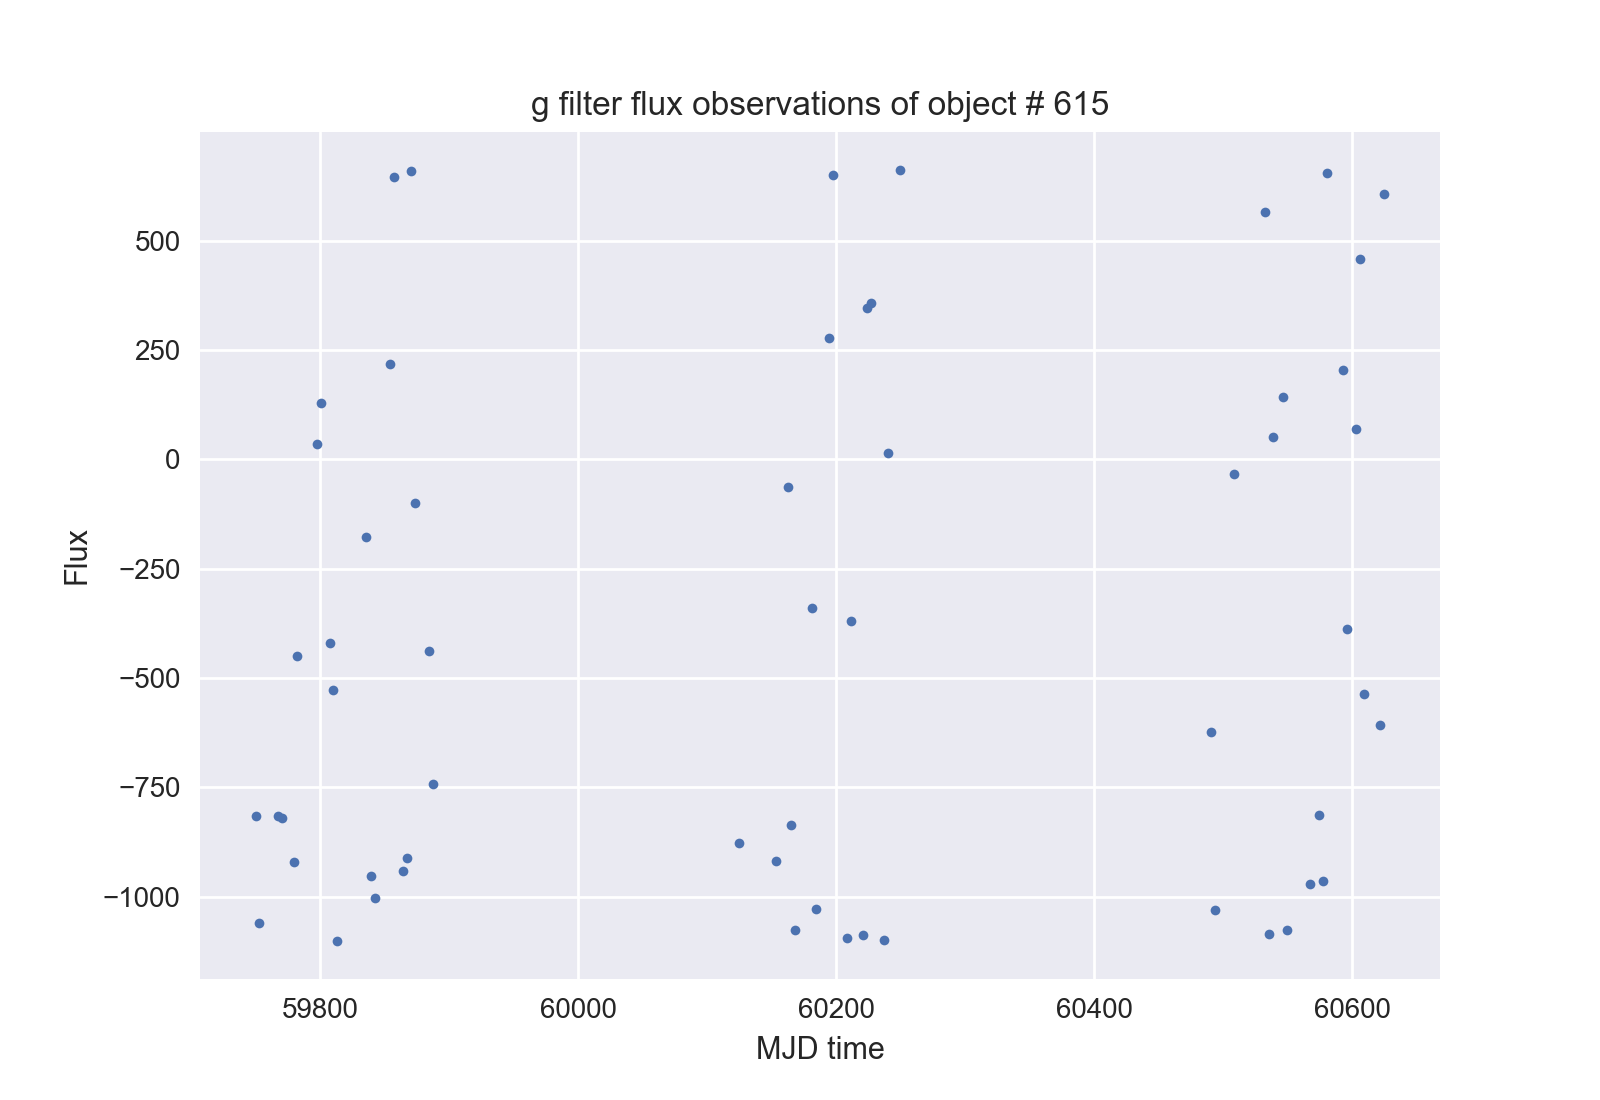

In [67]:
plt.plot(tsdict[615].time[1],tsdict[615].measurement[1],'.')
plt.title(tsdict[615].channel_names[1] + " filter flux observations of object # 615")
plt.xlabel("MJD time")
plt.ylabel("Flux")

In [69]:
old_names = featuretable.columns.values
new_names = ['{}_{}'.format(x, pbmap.get(y,'meta')) for x,y in old_names]
cols = [featuretable[col] for col in old_names]
allfeats = Table(cols, names=new_names)
del featuretable

In [70]:
allfeats

<Table length=7848>
amplitude_u  amplitude_g   amplitude_r  ... mwebv_meta  z_meta zerr_meta
  float64      float64       float64    ...  float64   float64  float64 
------------ ------------ ------------- ... ---------- ------- ---------
 121.0480155   880.533203   646.9217225 ...      0.017     0.0       0.0
  14.6225035    10.422385      10.29848 ...      0.007  1.6267    0.2552
    4.701063    4.5430945    11.9217745 ...      0.021  0.2262    0.0157
   10.944189   97.9313515   111.4774825 ...      0.007  0.2813    1.1523
    6.067815    19.896143    54.3781135 ...      0.024  0.2415    0.0176
  37.7481335    5.3372295     2.9092535 ...       0.02     0.0       0.0
 141.6043155   726.110041   646.5527645 ...      0.019   0.182    0.0304
   4.4964645       5.0916     3.5223645 ...      0.021  0.7014      0.01
  12.9644795   101.806106    117.792956 ...      0.027  0.3229     0.336
   7.1129255      3.57605    16.4874875 ...      0.018     0.0       0.0
         ...          ...           ... ...        ...     ...       ...
  38.4512645  185.1234435   228.2841035 ...      0.053     0.0       0.0
  171.597851  143.5142865   114.3187325 ...      0.043  2.6113    0.9733
  12.4978815    7.0334825     28.123286 ...      0.045  0.0569    0.0248
   11.608491     4.611242    18.6337285 ...      0.016     0.0       0.0
   59.753473    33.927573     33.619944 ...      0.291     0.0       0.0
  37.3578455   80.4592505    22.9596835 ...      0.013     0.0       0.0
 147.0494135    28.318704     8.8461435 ...      0.136  2.5606    1.1146
  93.8776265   49.7077895    54.2125635 ...       0.43     0.0       0.0
    24.88684   163.773464    16.9685295 ...      0.034     0.0       0.0
3901.2680205 1677.6048965 15725.7843835 ...      0.091     0.0       0.0

This table now contains some simple population statistics about each of the sources. 

My next attempt will be to try and identify the most correlated filters in order to save space, and start with the one most correlated to the label. Next I would want to create a recurrent neural net, and see if the time series variations in that can relay any useful information regarding the source's classification. 